In [1]:
import numpy as np
import matplotlib.pyplot as plt

import camb # per sepettro di potenza
from scipy.interpolate import interp1d

# Creating Target Power Spectrum

In [2]:
#Parametri per generare spettro
Omega_b = 0.05
Omega_c = 0.25

h = 0.7
As = 2.1e-9
ns = 0.96

pars = camb.CAMBparams()
pars.set_cosmology(H0=100*h, ombh2=Omega_b*h**2, omch2=Omega_c*h**2)
pars.InitPower.set_params(As=As, ns=ns);

In [3]:
pars.set_matter_power(redshifts=[10.], kmax= 100.)
result=camb.get_results(pars)

In [4]:
kh, z, pk = result.get_matter_power_spectrum(minkh=1.e-4, maxkh=100, npoints=512)

Text(0, 0.5, '$P(k) [h^{-3}\\mathrm{Mpc}^3]$')

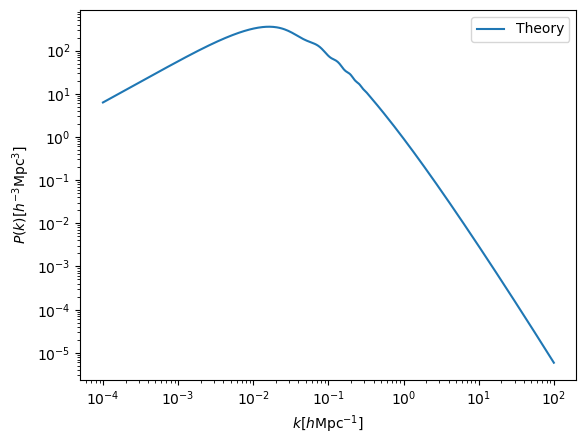

In [5]:
plt.loglog(kh, pk[0], label="Theory")
plt.legend(loc='best')
plt.xlabel(r'$k [h \mathrm{Mpc}^{-1}]$')
plt.ylabel(r'$P(k) [h^{-3}\mathrm{Mpc}^3]$')

In [6]:
# Create an interpolator for the power spectrum
pk_interpolate = interp1d(kh, pk[0], kind='cubic', fill_value='extrapolate')

# Create the Grid

In [7]:
side = 500 # lato della griglia in Mpc
Volume = side**3

# Genero celle nella griglia
n_cells = 100 # divido in 100^3 cellette
spacing = side/n_cells # lato di ciascun cubetto

print(spacing) #griglia di 5 Mpc tutto quello sotto lo perdo (non sto generando quello che c'è sotto)

5.0


In [8]:
kF = 2*np.pi/side # frequenza fondamentale, frequenza più piccola campionabile
kN = 2*np.pi/spacing # Nyquist di campionamento, frequenza più grande calcolabile (mia risoluzione)

print(kF, 'h/Mpc', kN, 'h/Mpc')

0.012566370614359173 h/Mpc 1.2566370614359172 h/Mpc


In [9]:
#Lavoriamo nella griglia in k 
kx = np.fft.fftfreq(n_cells, spacing)*np.pi*2 # dato celle e risoluzione dà valore di k
ky = np.fft.fftfreq(n_cells, spacing)*np.pi*2 # dato celle e risoluzione dà valore di k
kz = np.fft.rfftfreq(n_cells, spacing)*np.pi*2 # dato celle e risoluzione dà valore di k
#metto r in z perchè sono io che so che la griglia è data da un campo con trasformata reale; 100*100*51 è metà punti 100^3

print(kx.shape, ky.shape, kz.shape)

(100,) (100,) (51,)


In [10]:
kx

array([ 0.        ,  0.01256637,  0.02513274,  0.03769911,  0.05026548,
        0.06283185,  0.07539822,  0.08796459,  0.10053096,  0.11309734,
        0.12566371,  0.13823008,  0.15079645,  0.16336282,  0.17592919,
        0.18849556,  0.20106193,  0.2136283 ,  0.22619467,  0.23876104,
        0.25132741,  0.26389378,  0.27646015,  0.28902652,  0.30159289,
        0.31415927,  0.32672564,  0.33929201,  0.35185838,  0.36442475,
        0.37699112,  0.38955749,  0.40212386,  0.41469023,  0.4272566 ,
        0.43982297,  0.45238934,  0.46495571,  0.47752208,  0.49008845,
        0.50265482,  0.5152212 ,  0.52778757,  0.54035394,  0.55292031,
        0.56548668,  0.57805305,  0.59061942,  0.60318579,  0.61575216,
       -0.62831853, -0.61575216, -0.60318579, -0.59061942, -0.57805305,
       -0.56548668, -0.55292031, -0.54035394, -0.52778757, -0.5152212 ,
       -0.50265482, -0.49008845, -0.47752208, -0.46495571, -0.45238934,
       -0.43982297, -0.4272566 , -0.41469023, -0.40212386, -0.38

In [11]:
kx=np.fft.fftshift(kx) # li mette dal più piccolo al più grande
ky=np.fft.fftshift(ky)
#non per kz perchè solo con valori positivi e parte già da zero

In [12]:
kx


array([-0.62831853, -0.61575216, -0.60318579, -0.59061942, -0.57805305,
       -0.56548668, -0.55292031, -0.54035394, -0.52778757, -0.5152212 ,
       -0.50265482, -0.49008845, -0.47752208, -0.46495571, -0.45238934,
       -0.43982297, -0.4272566 , -0.41469023, -0.40212386, -0.38955749,
       -0.37699112, -0.36442475, -0.35185838, -0.33929201, -0.32672564,
       -0.31415927, -0.30159289, -0.28902652, -0.27646015, -0.26389378,
       -0.25132741, -0.23876104, -0.22619467, -0.2136283 , -0.20106193,
       -0.18849556, -0.17592919, -0.16336282, -0.15079645, -0.13823008,
       -0.12566371, -0.11309734, -0.10053096, -0.08796459, -0.07539822,
       -0.06283185, -0.05026548, -0.03769911, -0.02513274, -0.01256637,
        0.        ,  0.01256637,  0.02513274,  0.03769911,  0.05026548,
        0.06283185,  0.07539822,  0.08796459,  0.10053096,  0.11309734,
        0.12566371,  0.13823008,  0.15079645,  0.16336282,  0.17592919,
        0.18849556,  0.20106193,  0.2136283 ,  0.22619467,  0.23

# Generate Gaussian Random Field in Fourier Space

In [13]:
# Per ogni kx,y,z devo trovare modulo k, ottenere valori power spectrum ed usare questi 
# come varianza per ogni punto griglia
pks = np.zeros((n_cells, n_cells, n_cells//2+1))
pks.shape

(100, 100, 51)

In [14]:
for i in range(n_cells): #ciclo sulla grigia 
    kx = i if i<= n_cells // 2 else i-n_cells
    kx *= 2*np.pi/side
    for j in range(n_cells):
        ky = j if j<= n_cells // 2 else j-n_cells
        ky *= 2*np.pi/side
        for k in range(n_cells//2+1):
            kz = k*2*np.pi/side
            knorm=np.sqrt(kx**2+ky**2+kz**2)

            #if knorm == 0:
            #   pks[0,0,0]=0
            #else:
            pks[i,j,k] = pk_interpolate(knorm)
    
pks[0,0,0] = 0

In [15]:
#Dobbiamo generare numeri complessi perchè siamo nello spazio di Fourier con norma e fase
# Fase numero random tra 0 e 2pi mentre la  norma è numero estratto da un Gauss(0,1) moltiplicata per
# sqrt(Volume*P(k)/2)

Se scrivo:
$$
\delta(\hat{k})=\sqrt{VP(k)/2}(\theta_r+i\theta_i)
$$

In [16]:
phase = np.random.uniform(size=pks.shape)*2*np.pi
phase.shape

(100, 100, 51)

In [17]:
#for i in range(len(pks.flatten())):
 #   if pks.flatten()[i]<0:
  #      print(pks.flatten()[i])

In [18]:
delta_k_norm = np.random.normal(size=pks.shape)*np.sqrt(pks*Volume/2)

In [19]:
delta_k=delta_k_norm*(np.cos(phase)+1j*np.sin(phase))


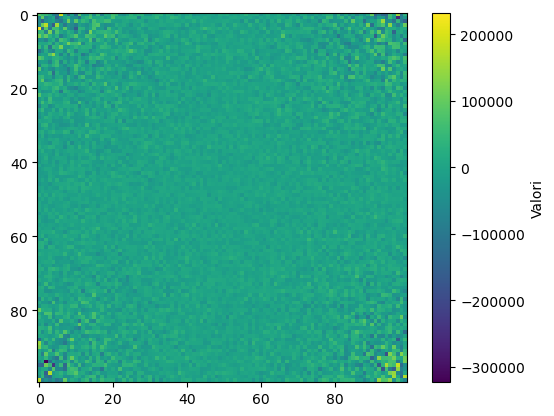

In [20]:
plt.imshow(delta_k_norm[:,:,2], cmap='viridis')
plt.colorbar(label='Valori')


In [21]:
delta_x = np.fft.irfftn(delta_k, norm='backward')/spacing**3 # torno da campo in k a campo in x

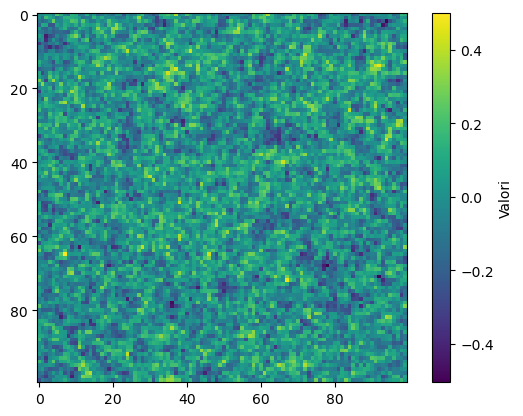

In [22]:
plt.imshow(delta_x[:,:,2], cmap='viridis')
plt.colorbar(label='Valori')


Text(0.5, 0, '$\\delta(x)$')

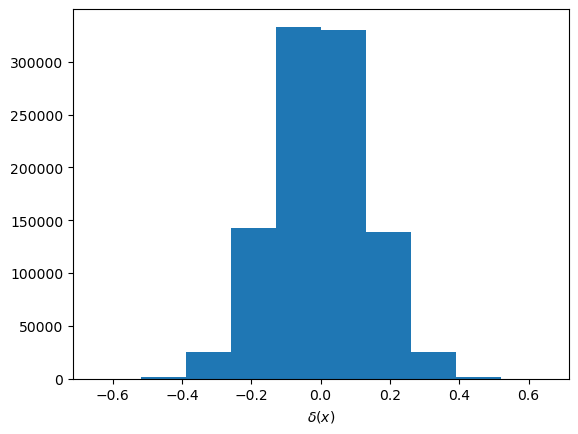

In [23]:
plt.hist(delta_x.flatten())
plt.xlabel(r'$\delta(x)$')

In [24]:
# posso cambiare redshift e rifare tutto e va fino a delta negativi; problema campi gaussinai è che possono divergere o violare anche forte bias che densità si apositivo
# gauss usati solo come inizio simulaioni 

In [25]:
np.mean(delta_x)


5.3290705182007515e-21

In [26]:
np.std(delta_x)

0.13549022276412961

# Extract Power Spectrum

In [27]:
#Extract Power spectrum:
kx = np.fft.fftfreq(n_cells, spacing)*np.pi*2
ky = np.fft.fftfreq(n_cells, spacing)*np.pi*2
kz = np.fft.rfftfreq(n_cells, spacing//2+1)*np.pi*2


In [28]:
knorm = []
for i in range(n_cells): #ciclo sulla grigia 
    kx = i if i<n_cells // 2 else i-n_cells
    kx *= 2*np.pi/side
    for j in range(n_cells):
        ky = j if j<= n_cells // 2 else j-n_cells
        ky *= 2*np.pi/side
        for k in range(n_cells//2+1):
            kz=k*2*np.pi/side
            knorm.append(np.sqrt(kx**2+ky**2+kz**2))

In [29]:
delta_k_sq = np.abs(delta_k)**2

In [30]:
pks = delta_k_sq.flatten()/Volume

Text(0, 0.5, '$P(k) [h^{-3}\\mathrm{Mpc}^3]$')

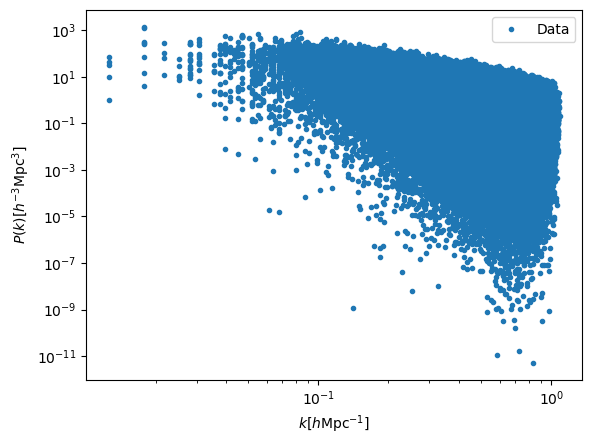

In [31]:
#P(k) in ogni punto della griglia
plt.loglog(knorm, pks, '.', label='Data')
plt.legend(loc='best')
plt.xlabel(r'$k [h \mathrm{Mpc}^{-1}]$')
plt.ylabel(r'$P(k) [h^{-3}\mathrm{Mpc}^3]$')

In [32]:
edges =np.arange(kF,kN,kF) #Definizione binning da kF a kN in passi di kF

In [33]:
edges

array([0.01256637, 0.02513274, 0.03769911, 0.05026548, 0.06283185,
       0.07539822, 0.08796459, 0.10053096, 0.11309734, 0.12566371,
       0.13823008, 0.15079645, 0.16336282, 0.17592919, 0.18849556,
       0.20106193, 0.2136283 , 0.22619467, 0.23876104, 0.25132741,
       0.26389378, 0.27646015, 0.28902652, 0.30159289, 0.31415927,
       0.32672564, 0.33929201, 0.35185838, 0.36442475, 0.37699112,
       0.38955749, 0.40212386, 0.41469023, 0.4272566 , 0.43982297,
       0.45238934, 0.46495571, 0.47752208, 0.49008845, 0.50265482,
       0.5152212 , 0.52778757, 0.54035394, 0.55292031, 0.56548668,
       0.57805305, 0.59061942, 0.60318579, 0.61575216, 0.62831853,
       0.6408849 , 0.65345127, 0.66601764, 0.67858401, 0.69115038,
       0.70371675, 0.71628313, 0.7288495 , 0.74141587, 0.75398224,
       0.76654861, 0.77911498, 0.79168135, 0.80424772, 0.81681409,
       0.82938046, 0.84194683, 0.8545132 , 0.86707957, 0.87964594,
       0.89221231, 0.90477868, 0.91734505, 0.92991143, 0.94247

In [34]:
pk_meas = np.zeros(len(edges)-1)
k_bin = (edges[1:]+edges[0:-1])/2 #valori di k al centro del bin

In [35]:
for i in range(len(k_bin)):
    k_selection = np.where((knorm>edges[i])&(knorm<edges[i+1]))[0]
    pk_meas[i]= np.mean(pks[k_selection])

/home/git/anaconda3/envs/acc-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/git/anaconda3/envs/acc-env/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, '$P(k) [h^{-3}\\mathrm{Mpc}^3]$')

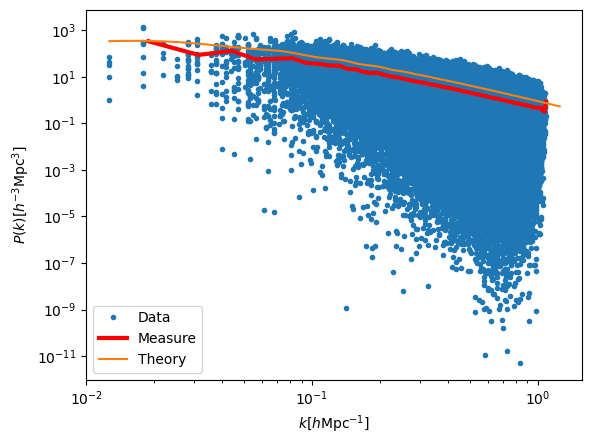

In [36]:
plt.loglog(knorm, pks, '.', label='Data')
plt.loglog(k_bin, pk_meas, '-', label='Measure', color='r', lw=3)
plt.loglog(kh[ (kh>kF) & (kh<kN) ], pk[0][ (kh>kF) & (kh<kN) ], label="Theory")
plt.legend(loc='best')
plt.xlabel(r'$k [h \mathrm{Mpc}^{-1}]$')
plt.ylabel(r'$P(k) [h^{-3}\mathrm{Mpc}^3]$')
#plt.loglog(kh[])

Fattore due da qualche parte in mancanza.

# Generate LogNormal Density Field

In [37]:
len(knorm)

510000

In [38]:
knorm = np.reshape(knorm, newshape=(100,100,51)) # per griglia
knorm.shape

(100, 100, 51)

In [39]:
# Step 1: Power spectrum on the grid

pks = pk_interpolate(knorm)
pks.shape

(100, 100, 51)

In [40]:
# Step 2: Get 2PCF
xi = np.fft.irfftn(pks) / spacing**3 #real fast fourier transform inversa

In [41]:
xi.shape # ho gliglia nello spazio reale, xi a tale separazione dall'antitrasformata

(100, 100, 100)

In [42]:
knorm[56,72,21]

0.7065161797082183

In [43]:
pks[56,72,21]

2.011405093778017

In [44]:
xi[1,1,1]

0.006266127500575849

In [45]:
# Dobbiamo ora generare campo gaussiano non con xi ma xi_g
# Generate gaussian 2PCF
xi_g = np.log(1+xi)

In [46]:
xi[1,1,1], xi_g[1,1,1]

(0.006266127500575849, 0.006246576951964525)

In [47]:
# Get power spectrum for G

pk_g = np.fft.rfftn(xi_g) * spacing**3

In [48]:
pk_g.shape

(100, 100, 51)

In [49]:
# Generate G(k)

phase = np.random.uniform(size=pks.shape)*2*np.pi

In [50]:

G_k_norm = np.random.normal(size=pks.shape) * np.sqrt(pk_g * Volume)
G_k_norm[0,0,0]=0

G_k=G_k_norm * (np.cos(phase) + 1j * np.sin(phase))


In [51]:
# Compute G(x)
G_x = np.fft.irfftn(G_k, norm='backward') / spacing**3

In [52]:
G_x.shape

(100, 100, 100)

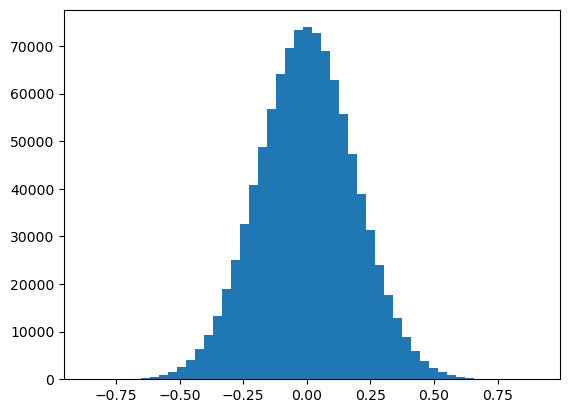

In [53]:
plt.hist(G_x.flatten(), histtype='bar', bins=50);

In [54]:
# Apply lognormal transformation to get delta_x
var_G = np.var(G_x)

In [55]:
delta_x = np.exp(G_x - var_G) -1

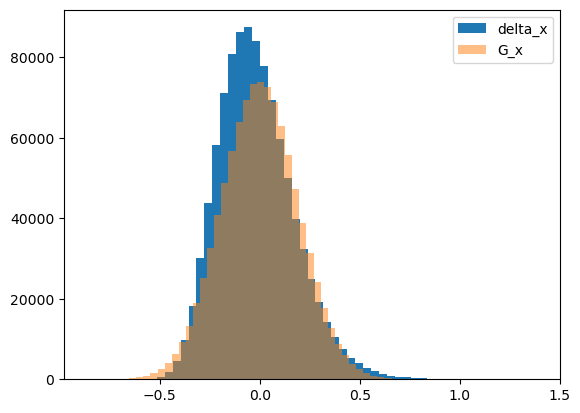

In [56]:
plt.hist(delta_x.flatten(), histtype='bar', bins=50, label='delta_x');
plt.hist(G_x.flatten(), histtype='bar', bins=50, alpha=0.5, label='G_x');
plt.legend(loc='best')

Vantaggio mai sotto meno 1 e distorce un po' la forma come di fatto è nei campi di densità veri.

In [57]:
# Compute Power Spectrum og lognormal field

'''
delta_k = np.fft.rfftn(delta_x, norm='backward')*spacing**3
delta_k_sq= np.abs(delta_k)**2
pks = delta_k_sq.flatten()/Volume
'''

"\ndelta_k = np.fft.rfftn(delta_x, norm='backward')*spacing**3\ndelta_k_sq= np.abs(delta_k)**2\npks = delta_k_sq.flatten()/Volume\n"

Fin qui campo distribuito su una griglia in cui ogni punto ha suo valore. Nella realtà vedo particelle che metto su griglia e poi ne faccio spettero potenza. Shot noise allora presente, termine proporzionale ad 1/densità: contributo piatto che influenza tutte le scale dovuto al fatto che prendo campo e campiono in modo finito.
Per discrettizare campo densità trovato: assumo delta trovata media di una distribuzione Poisson e assumo per estrarre da una distribuzione target. 

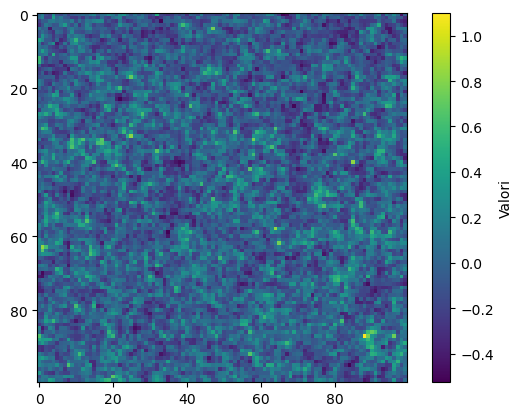

In [58]:
plt.imshow(delta_x[:,:,2], cmap='viridis')
plt.colorbar(label='Valori')